In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,confusion_matrix
import os

In [5]:
os.getcwd()

'/Users/akankshamishra/Downloads'

In [6]:
os.chdir("/Users/akankshamishra/Desktop/DataScience/Data sets/")

In [7]:
news = pd.read_csv("uci-news-aggregator.csv")

In [8]:
news.head()

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [9]:
# subset data
news = news[["TITLE", "CATEGORY"]]

# distribution of classes
dist = news["CATEGORY"].value_counts()


# display class distribution
print(dist)

e    152469
b    115967
t    108344
m     45639
Name: CATEGORY, dtype: int64


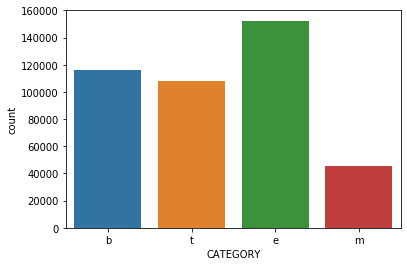

In [10]:
sns.countplot(news["CATEGORY"])

In [11]:
news.head()

,TITLE,CATEGORY
0,"Fed official says weak data caused by weather,...",b
1,Fed's Charles Plosser sees high bar for change...,b
2,US open: Stocks fall after Fed official hints ...,b
3,"Fed risks falling 'behind the curve', Charles ...",b
4,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,b


# DataPreprocessing

-Retaining only alphabets (Using regular expressions)

-Removing stopwords (Using nltk library)

-Splitting into train and test sets (Uisng scikit-learn library)

In [12]:
# stopwords 
stop = set(stopwords.words('english'))

# retain only alphabets
news['TITLE'] = news['TITLE'].apply(lambda x:re.sub("[^a-zA-Z]", " ",x))

# convert to lowercase and tokenize
news['TITLE'] = news['TITLE'].apply(lambda x:x.lower().split())

# remove stopwords
news['TITLE'] = news['TITLE'].apply(lambda x:[i for i in x if i not in stop])

# join list elements
news['TITLE'] = news['TITLE'].apply(lambda x: ' '.join(x))

# split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(news["TITLE"], news["CATEGORY"],test_size = 0.2,random_state=3)
news.head()

,TITLE,CATEGORY
0,fed official says weak data caused weather slo...,b
1,fed charles plosser sees high bar change pace ...,b
2,us open stocks fall fed official hints acceler...,b
3,fed risks falling behind curve charles plosser...,b
4,fed plosser nasty weather curbed job growth,b


# Vectorize with Bag-of-words and TF-IDF approach

After cleaning data its time to vectorize data so that it can be fed into an ML algorithm. I will be doing it with two approaches: Bag-of-words and TF-IDF.

In [13]:
# initialize count vectorizer
count_vectorizer = CountVectorizer()

# initialize tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))

# fit and transform with count vectorizer
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)


# fit and transform with tfidf vectorizer
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Code ends here

print(X_train_count.shape)
print(X_test_tfidf.shape)

(337935, 45942)
(84484, 1985947)


# Predicting with Multinomial Naive Bayes 

Multinomial Naive Bayes is an algorithm that can be used for the purpose of multi-class classification. I will be using it to train and test it on both the versions i.e. Bag-of-words and TF-IDF ones and then checking the accuracy on both of them

In [14]:
from sklearn.naive_bayes import MultinomialNB

In [15]:
# initialize multinomial naive bayes
nb_1 = MultinomialNB()
nb_2 = MultinomialNB()

# fit on count vectorizer training data
nb_1.fit(X_train_count,Y_train)

# fit on tfidf vectorizer training data
nb_2.fit(X_train_tfidf,Y_train)

# accuracy with count vectorizer
acc_count_nb = accuracy_score(nb_1.predict(X_test_count), Y_test)

# accuracy with tfidf vectorizer
acc_tfidf_nb = accuracy_score(nb_2.predict(X_test_tfidf), Y_test)

# display accuracies
print(acc_count_nb)
print(acc_tfidf_nb)

0.9268618910089484
0.9323895648880262


In [16]:
import warnings
warnings.filterwarnings('ignore')

# Predicting with Logistic Regression

Logistic Regression can be used for binary classification but when combined with OneVsRest classifer, it can perform multiclass classification as well. You will be using one such algorithm to train and test it on both the versions i.e. Bag-of-words and TF-IDF ones and then checking the accuracy on both of them.

In [19]:
# initialize logistic regression
logreg_1 = OneVsRestClassifier(LogisticRegression(random_state=10))
logreg_2 = OneVsRestClassifier(LogisticRegression(random_state=10))

# fit on count vectorizer training data
logreg_1.fit(X_train_count,Y_train)

# fit on tfidf vectorizer training data
logreg_2.fit(X_train_tfidf, Y_train)

# accuracy with count vectorizer
acc_count_logreg = accuracy_score(logreg_1.predict(X_test_count), Y_test)

# accuracy with tfidf vectorizer
acc_tfidf_logreg = accuracy_score(logreg_2.predict(X_test_tfidf), Y_test)

# display accuracies
print(acc_count_logreg)
print(acc_tfidf_logreg)

0.9464632356422518
0.9428649211685053
